<br>
<br>
<br>
<h1><center>Assignment 03</center></h1>
<h2><center>Exploratory Data Analysis</center></h2>
<h4><center>[ISYS2047] Information Systems Solutions and Design</center></h4>
<br>
<div style="text-align: right"><h4>Student name: Juyeon Kim</h4></div>
<div style="text-align: right"><h4>Student ID: S3741327</h4></div>
<br>

## Import libraries

In [1]:
# Pandas is the main library used for exploratory data analysis
# Numpy allows fast advanced mathematical operations on large amount of data
import numpy as np
import pandas as pd

# Library to assign missing values - not used here, better do it in EDA
from sklearn.impute import SimpleImputer

# Matplotlib is the main plotting library for python
# Seaborn is built on top of matplotlib and it's easier to use
# pandas also have same basic plotting capabilities which are again built on top of matplotlib
import matplotlib.pyplot as plt
# The next statement instructs matplotlib to plot the graphs inside the notebook
%matplotlib inline 
import seaborn as sns

# progress bar
from tqdm.notebook import tqdm


# pickle cleaned data
import joblib
import os

# Exploratory Data Analysis (EDA)

## 1. Load and Check the missing data

In [2]:
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-', ''] 
# last year's promotion campaign: who accepted or rejected personal offer made to them. 
# all the suspecting missing values are re-encoded as "NaN"
loan_df = pd.read_csv("personal-loan.csv", na_values=missing_values)
# Display a few rows
loan_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no


* Rows explanation <br>
1 customer_id:  Customer identifier <br>
2 age: Customer age in years <br>
3 yrs_experience: Years of working experience of the customer <br>
4 family_size: Number of family members of the customer <br>
5 education: Education level of customer <br>
6 income: Income level of customer (thousand dollars per year) <br>
7 mortgage: Mortage amount teken by customer <br>
8 credit_card_acct: Does the customer have a credit account with the bank? <br>
9 credit_card_spend: Monthly credit card spending by customer in thousands of dollars <br>
10 share_trading_acct: Does the customer have a share trading account (for buying and selling shares) with the bank? [0=No, 1=Yes] <br>
11 fixed_deposit_acct: Does the customer have a fixed term deposit account with the bank?  [0=No, 1=Yes] <br>
12 online_acct: Does the customer have an online banking account? <br>
13 personal_loan: Did the customer take a personal loan as a result of the previous marketing campaign by the bank?  [0=No, 1=Yes] <br>

## 3. Overview of the data

### 3.1. Data frame info

In [3]:
# Print dataframe info
print(f'\t- Print dataframe info:')
loan_df.info()

	- Print dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 5620 non-null   float64
 2   yrs_experience      5636 non-null   float64
 3   family_size         5615 non-null   float64
 4   education_level     6000 non-null   object 
 5   income              5623 non-null   float64
 6   mortgage_amt        6000 non-null   int64  
 7   credit_card_acct    6000 non-null   object 
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   int64  
 10  fixed_deposit_acct  6000 non-null   int64  
 11  online_acct         6000 non-null   object 
 12  personal_loan       6000 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 609.5+ KB


### 3.2. Convert "object" data type into "categorical" data**
- In order to conduct descriptive analysis on each and every column, all columns in object data type have to be converted into numeric data type
- {'Graduate': 2, 'Advanced or Professional': 1, 'Undergraduate': 0}
- {'yes': 1, 'no': 0}

In [4]:
print(f'\t - education_level unique values: {list(loan_df.education_level.unique())}')
print(f'\t - credit_card_acct unique values: {list(loan_df.credit_card_acct.unique())}')
print(f'\t - online_acct unique values: {list(loan_df.online_acct.unique())}')
print(f'\t - personal_loan unique values: {list(loan_df.personal_loan.unique())}')

	 - education_level unique values: ['Graduate', 'Advanced or Professional', 'Undergraduate']
	 - credit_card_acct unique values: ['yes', 'no']
	 - online_acct unique values: ['yes', 'no']
	 - personal_loan unique values: ['no', 'yes']


In [5]:
edu_level_dict = {
    'Graduate': 2, 
    'Advanced or Professional': 1, 
    'Undergraduate': 0
}

yes_no_dict = {
    'yes': 1,
    'no': 0
}

In [6]:
# Convert all object data type into categorical data (Rename values)
loan_df["education_level"] = loan_df["education_level"].replace(edu_level_dict)
loan_df["credit_card_acct"] = loan_df["credit_card_acct"].replace(yes_no_dict)
loan_df["online_acct"] = loan_df["online_acct"].replace(yes_no_dict)
loan_df["personal_loan"] = loan_df["personal_loan"].replace(yes_no_dict)
loan_df

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,2,60.0,0,1,1.7,0,0,1,0
1,5737,65.0,27.0,4.0,1,36.0,90,0,0.0,0,0,1,0
2,4209,61.0,3.0,2.0,0,145.0,314,0,0.0,0,1,1,1
3,4734,29.0,14.0,1.0,0,52.0,0,0,0.0,1,0,1,0
4,2551,43.0,23.0,4.0,2,33.0,0,0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5440,36.0,4.0,1.0,0,72.0,0,0,0.0,0,0,1,0
5996,1251,56.0,25.0,2.0,0,110.0,0,0,0.0,0,0,0,0
5997,2454,34.0,11.0,2.0,1,57.0,0,0,0.0,1,0,1,0
5998,1435,30.0,NaN,2.0,0,85.0,81,0,0.0,0,0,1,0


In [7]:
# Data type changed: object -> int
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 5620 non-null   float64
 2   yrs_experience      5636 non-null   float64
 3   family_size         5615 non-null   float64
 4   education_level     6000 non-null   int64  
 5   income              5623 non-null   float64
 6   mortgage_amt        6000 non-null   int64  
 7   credit_card_acct    6000 non-null   int64  
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   int64  
 10  fixed_deposit_acct  6000 non-null   int64  
 11  online_acct         6000 non-null   int64  
 12  personal_loan       6000 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 609.5 KB


### 3.3. Shape of dataframe

In [8]:
# Shape of dataframe
print(f'\t - data contains: {loan_df.shape[0]} people','\n')
# Print all the name of columns
print(f"\t - Features : {loan_df.columns.tolist()}",'\n')

# One dependent (outcome) variable: personal_loan
# The other all variables are counted as the independent variables
print(f'\t - there are {loan_df.shape[1]} features in total including 1 outcome variable','\n')

	 - data contains: 6000 people 

	 - Features : ['customer_id', 'age', 'yrs_experience', 'family_size', 'education_level', 'income', 'mortgage_amt', 'credit_card_acct', 'credit_card_spend', 'share_trading_acct', 'fixed_deposit_acct', 'online_acct', 'personal_loan'] 

	 - there are 13 features in total including 1 outcome variable 



### 3.4. NaN & Unique values

In [9]:
# Print the toal number of rows containing null values
print(f"\t - Row counts with missing values :  {loan_df.isnull().sum().values.sum()}")

	 - Row counts with missing values :  1506


In [10]:
# Print all the unique values
print(f"Unique values :  {loan_df.nunique()}")
# continuous data: age, yrs_experience, family_size, income, mortgate_amt, credit_card_spend
# categorical data: customer_id, education_level, credit_card_acct, share_trading_acct, fixed_deposit_acct, online_accnt, personal_loan

Unique values :  customer_id           3786
age                     49
yrs_experience          47
family_size              6
education_level          3
income                 257
mortgage_amt           300
credit_card_acct         2
credit_card_spend       85
share_trading_acct       2
fixed_deposit_acct       2
online_acct              2
personal_loan            2
dtype: int64


### 3.5 Descriptive statistics for continuous variables

In [11]:
loan_df.describe().T # Transpose for visibility

,count,mean,std,min,25%,50%,75%,max
customer_id,6000.0,3027.886667,1723.488432,3.0,1553.75,3045.5,4511.0,6000.0
age,5620.0,45.556940,13.373778,23.0,34.00,45.0,56.0,92.0
yrs_experience,5636.0,21.182221,13.247945,0.0,10.00,21.0,32.0,65.0
family_size,5615.0,2.468566,1.215636,1.0,1.00,2.0,4.0,7.0
education_level,6000.0,0.878667,0.826070,0.0,0.00,1.0,2.0,2.0
income,5623.0,88.143873,48.736053,8.0,52.00,82.0,118.0,300.0
mortgage_amt,6000.0,67.585667,88.155099,0.0,0.00,0.0,125.0,617.0
credit_card_acct,6000.0,0.297167,0.457049,0.0,0.00,0.0,1.0,1.0
credit_card_spend,6000.0,0.627467,1.423450,0.0,0.00,0.0,0.4,9.5
share_trading_acct,6000.0,0.099167,0.298911,0.0,0.00,0.0,0.0,1.0


### 3.6. Correlations
+ values greater than 0.7/0.8 are considered significant relationship

***Method 1. use corr() function***

In [12]:
corr = loan_df.corr()
print(f'\t - Type of corr table',type(corr))

# Reorder from the most significant -> to the least significant attributes to the outcome variable (personal_loan)
corr[['personal_loan']].sort_values(by='personal_loan', key=abs ,ascending=False)

	 - Type of corr table <class 'pandas.core.frame.DataFrame'>


,personal_loan
personal_loan,1.000000
income,0.491728
fixed_deposit_acct,0.388889
mortgage_amt,0.259120
credit_card_spend,0.188654
education_level,0.154946
family_size,0.079590
yrs_experience,-0.065926
age,-0.029942
share_trading_acct,0.019911


***Method 2. use Seaborn's pairplot() function***
- This process may take up to 3 mins to execute

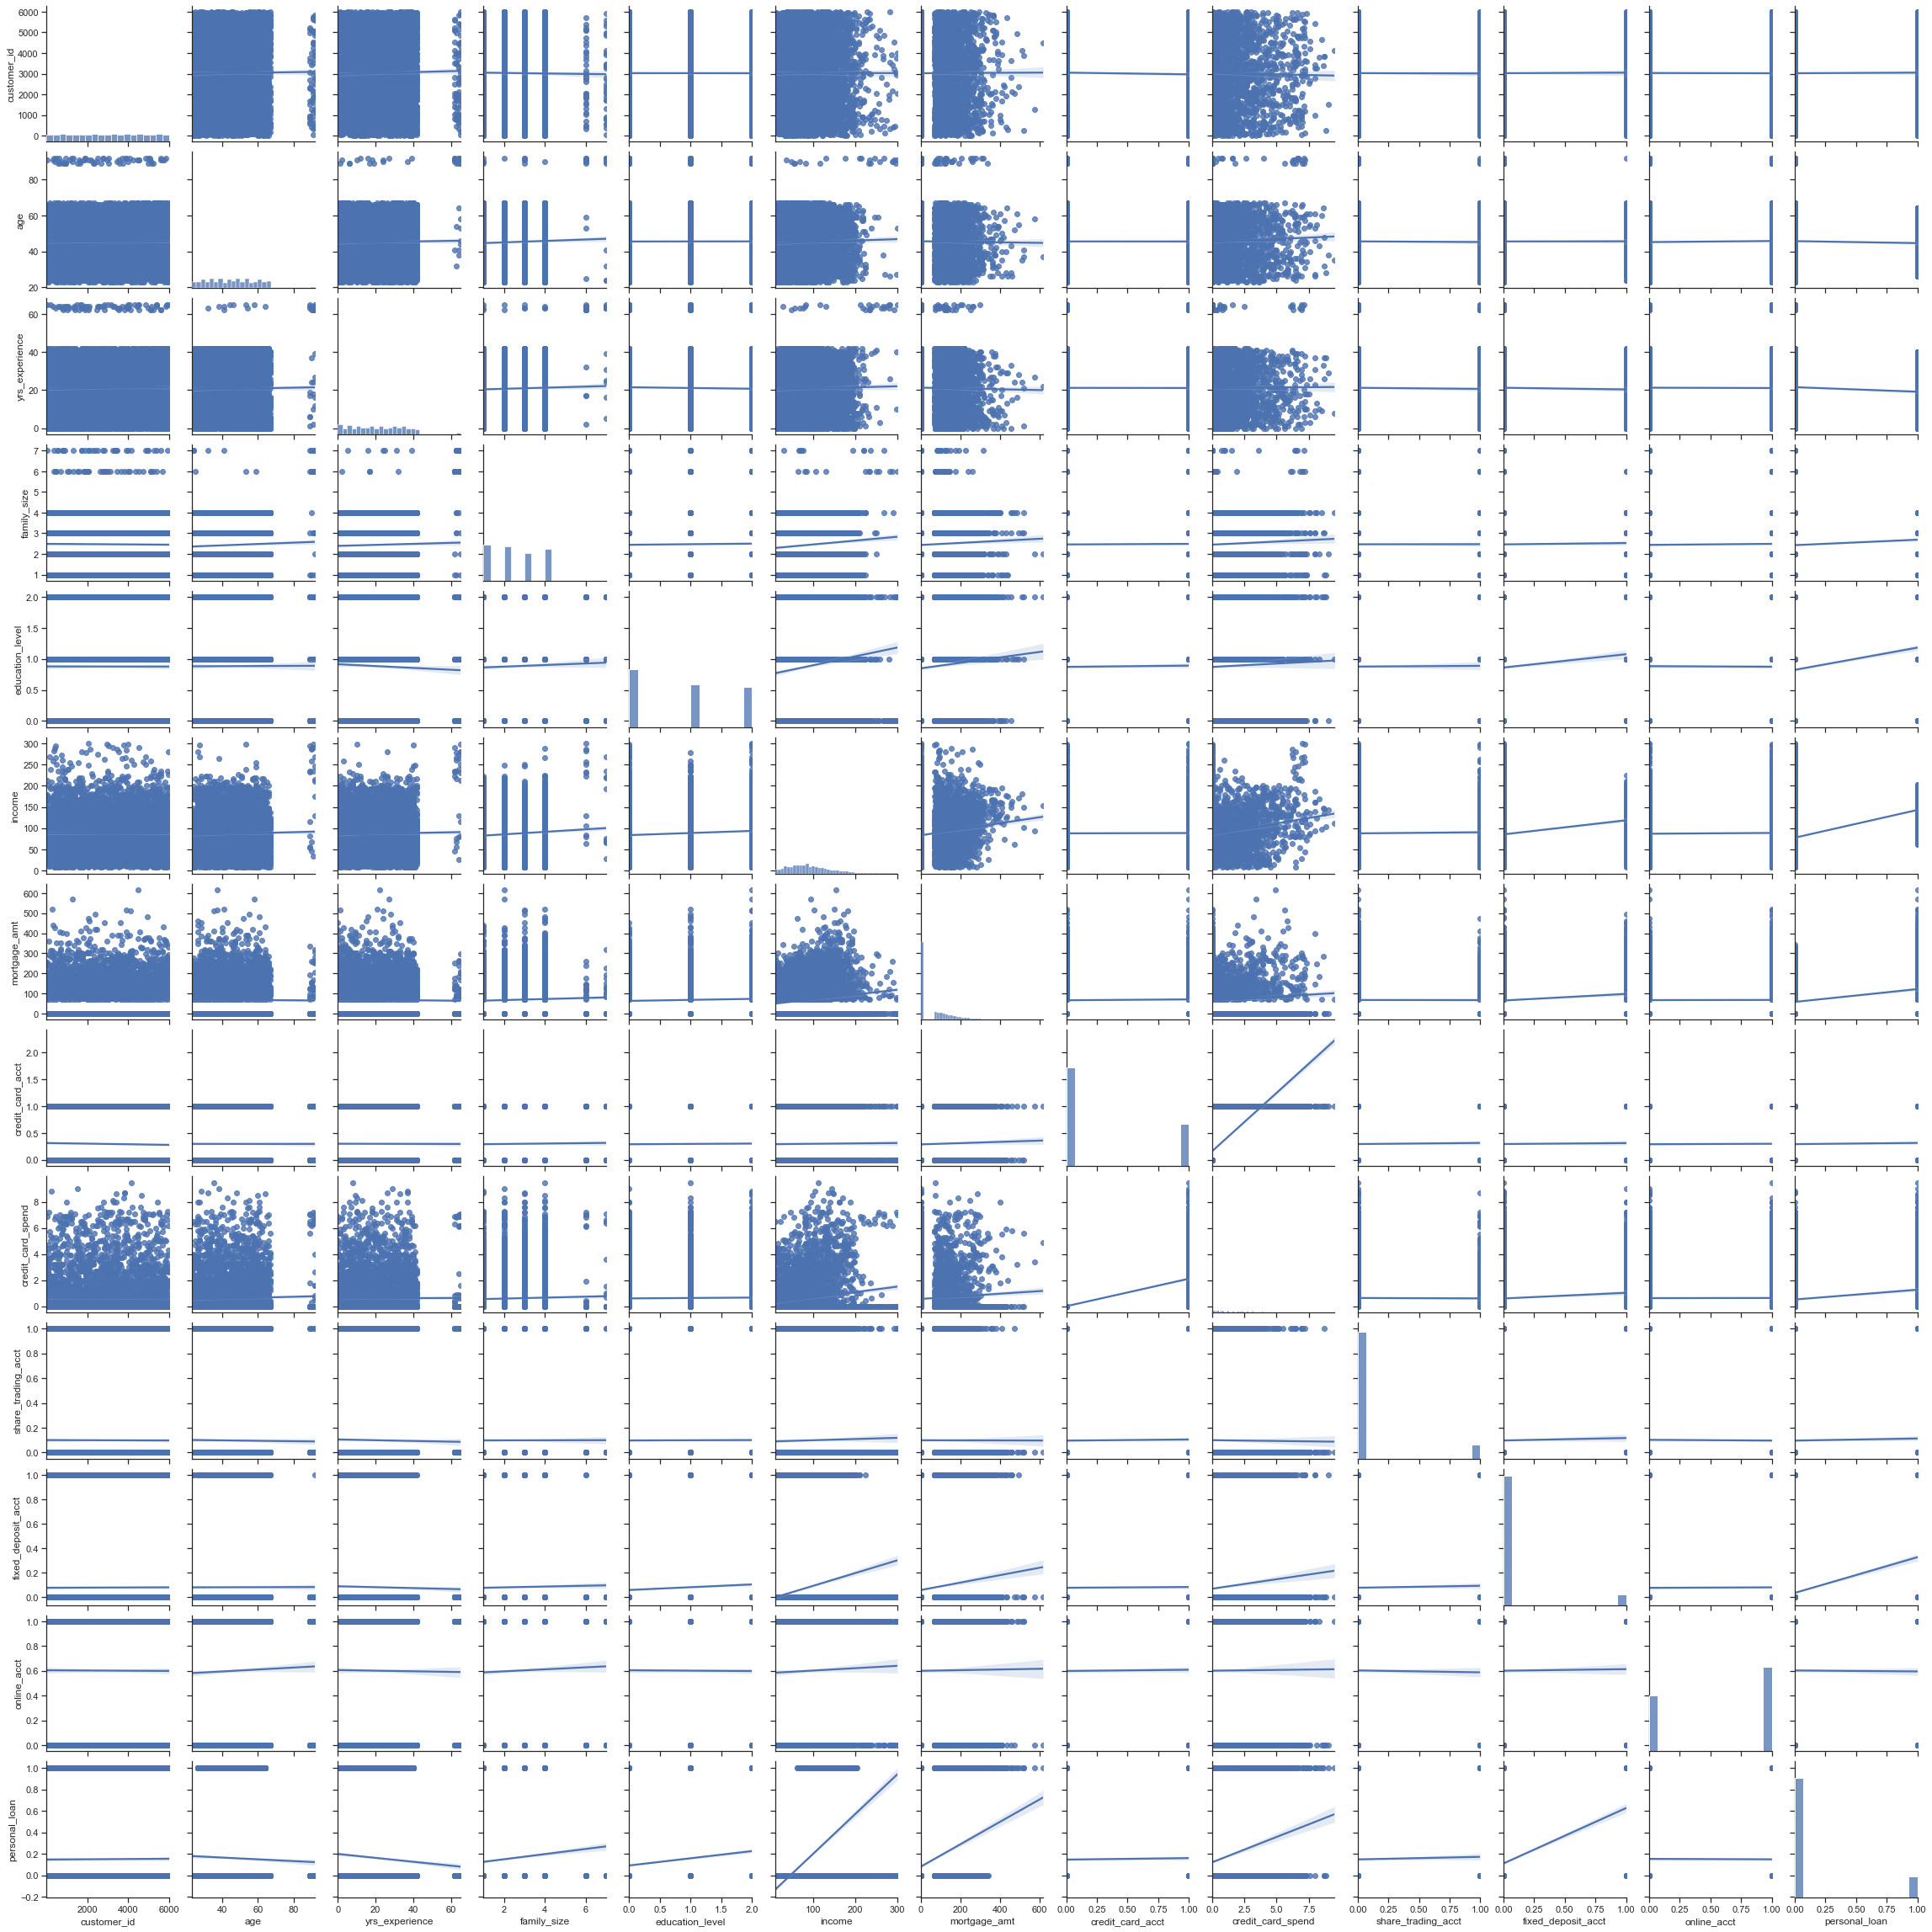

In [13]:
sns.set(style='ticks')
#plt.figure(figsize=(8,16)) #figsize(width, height) in inches - default(6.4, 4.8) - customise as required
sns.pairplot(loan_df, kind="reg") # kind="reg" means plot the regression line as well

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('correlation-pairplot.png', dpi=300) # dpi=300 is print quality

***Method 3. use Seaborn's heatmap() function***


Text(0.5, 1.0, 'Correlation between features')

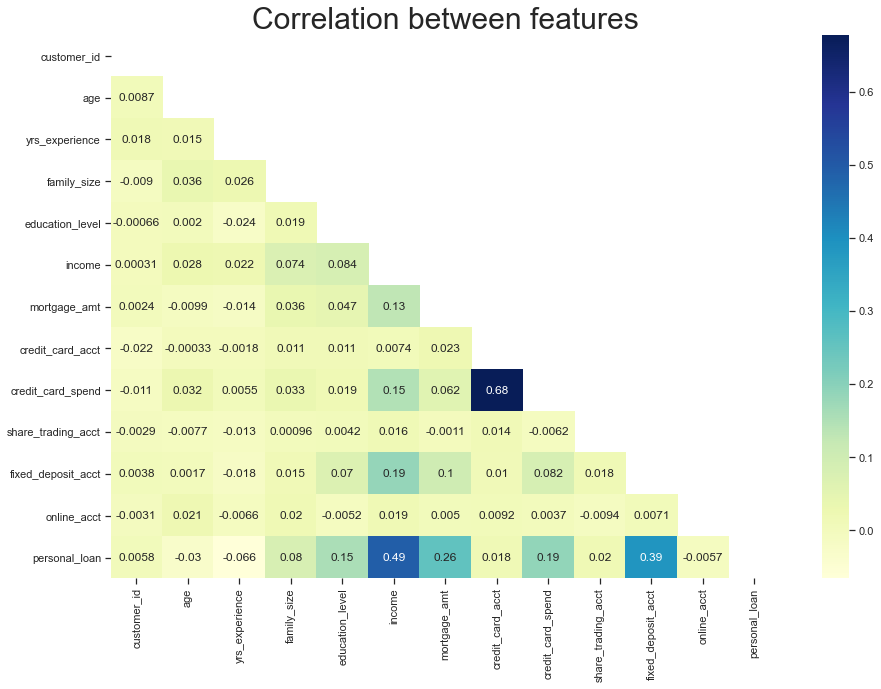

In [14]:
# Triangular shape of the matrix was used to avoid repeated outcome.
matrix = np.triu(loan_df.corr())
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(loan_df.corr(), annot=True, mask=matrix,  cmap="YlGnBu")
plt.title('Correlation between features', fontsize = 30)

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('correlation-heatmap-traingular.png', dpi=300) # dpi=300 is print quality

### Interpretation

***There is somehow strong relationships in the last column(personal_loan) that are:***
> - income 0.49: this is still below 0.7-8 because an income itself does not cause diabetes and the other factors are involved
> - fixed_deposit_acct: 0.39
> - mortgate_amt: 0.26


***The other columns show how one variable is related to other variables. There are a strong relationship between...***
> - credit_card_spend and credit_cart_acct: 0.68

# 4. Visualization

- many of visualization techniques will not work with the null value -> data cleaning must be preceded. 
- since you want to explore the data as it is, you don't want to manipulate the data and the only choice that you have is to delete the rows with null values.
- all the suspecting missing values are encoded as NaN
- the variables of "age" and "family_size" that make no sense to contain value "0" does not contain value "0". 

## 4.1. Handle missing values

### 4.1.1. Overview of Missing values

In [15]:
# Count of missing values in the whole dataframe by column
loan_df.isnull().sum()

customer_id             0
age                   380
yrs_experience        364
family_size           385
education_level         0
income                377
mortgage_amt            0
credit_card_acct        0
credit_card_spend       0
share_trading_acct      0
fixed_deposit_acct      0
online_acct             0
personal_loan           0
dtype: int64

In [16]:
# Drop missing values
loan_df_wo_m = loan_df.dropna() # loan_df_wo_m: loan_df without missing values
loan_df_wo_m

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,2,60.0,0,1,1.7,0,0,1,0
1,5737,65.0,27.0,4.0,1,36.0,90,0,0.0,0,0,1,0
2,4209,61.0,3.0,2.0,0,145.0,314,0,0.0,0,1,1,1
3,4734,29.0,14.0,1.0,0,52.0,0,0,0.0,1,0,1,0
4,2551,43.0,23.0,4.0,2,33.0,0,0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,542,60.0,0.0,3.0,0,178.0,78,0,0.0,0,0,0,0
5995,5440,36.0,4.0,1.0,0,72.0,0,0,0.0,0,0,1,0
5996,1251,56.0,25.0,2.0,0,110.0,0,0,0.0,0,0,0,0
5997,2454,34.0,11.0,2.0,1,57.0,0,0,0.0,1,0,1,0


### 4.1.2. % of People took a loan last year

labels: ['Yes', 'No']
values: [4510, 900]


Text(0.5, 1.0, 'Proportion of people took a loan last year')

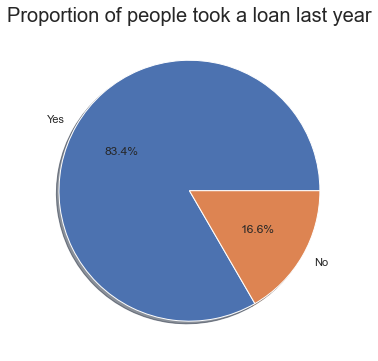

In [17]:
# Plot a pie chart
# Get the labels from the "outcome" column - use keys() function to get the labels
#labels = diabetes_df["outcome"].value_counts().keys().tolist() # [0,1] not meaningful
labels = ["Yes", "No"]
print(f"labels: {labels}")

# Get the values from the "outcome" column - use values to get the values
values = loan_df_wo_m["personal_loan"].value_counts().values.tolist()
print(f"values: {values}")

# Use matplotlib to draw a simple pie chart
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html
plt.figure(figsize=(6,6)) #figsize(width, height) in inches - default(6.4, 4.8) - customise as required
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Proportion of people took a loan last year", fontsize=20) # use fontsize=20 if title is too small

# plt.show() # Do not use this is you want to save to file - the file will be empty

# # Save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('proportion-diabetics.png', dpi=300)

## 4.2. Visualization of Variables

### 4.2.1 Data preparation

1. Split the data into no-loan-taker and loan-taker

In [18]:
# No-loan-taker
no_loan_taker_df = loan_df_wo_m[loan_df_wo_m["personal_loan"]==0]
no_loan_taker_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,2,60.0,0,1,1.7,0,0,1,0
1,5737,65.0,27.0,4.0,1,36.0,90,0,0.0,0,0,1,0
3,4734,29.0,14.0,1.0,0,52.0,0,0,0.0,1,0,1,0
4,2551,43.0,23.0,4.0,2,33.0,0,0,0.0,0,0,1,0
5,4491,44.0,18.0,3.0,1,49.0,0,0,0.0,0,0,1,0


In [19]:
# Loan-taker
loan_taker_df = loan_df_wo_m[loan_df_wo_m["personal_loan"]==1]
loan_taker_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
2,4209,61.0,3.0,2.0,0,145.0,314,0,0.0,0,1,1,1
12,2179,64.0,13.0,2.0,2,175.0,0,0,0.0,0,1,0,1
20,3181,31.0,11.0,2.0,2,182.0,262,1,4.7,1,0,1,1
21,2330,29.0,31.0,2.0,2,144.0,96,0,0.0,0,0,1,1
25,1591,45.0,19.0,1.0,2,143.0,291,0,0.0,0,1,1,1


### 4.2.2 Visualization of continuous variables

#### A. Impact of "income" on taking a loan

Text(0, 0.5, 'Density')

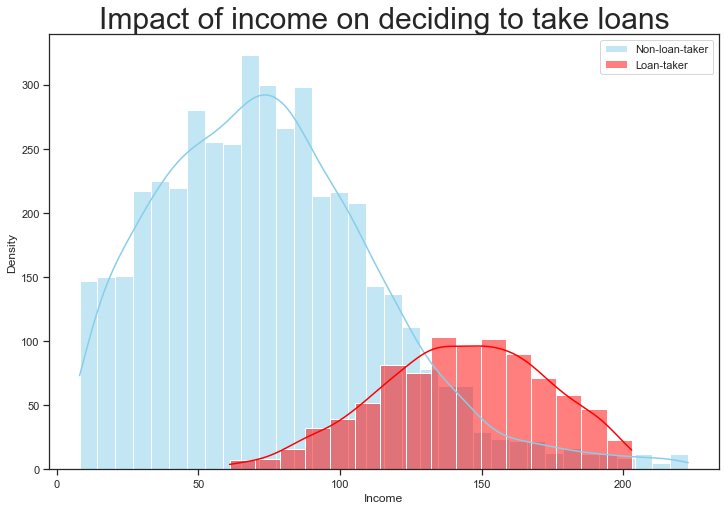

In [20]:
# Plot frequency distributions of non-diabetics and diabetics
# Ref:https://seaborn.pydata.org/generated/seaborn.distplot.html

plt.figure(figsize=(12,8)) # figsize(width, height) in inches - default(6.4, 4.8)

# Histogram with absolute numbers on y-axis (kde=False - default)
#sns.histplot(data=non_diabetics_df, x="glucose", color="skyblue", label="Non-Diabetics")
#sns.histplot(data=diabetics_df, x="glucose", color="red", label="Diabetics")

# Histogram with density on y-xis (kde=True)
sns.histplot(data=no_loan_taker_df, x="income", color="skyblue", label="Non-loan-taker", kde=True)
sns.histplot(data=loan_taker_df, x="income", color="red", label="Loan-taker", kde=True)

plt.legend()
plt.title('Impact of income on deciding to take loans', fontsize = 30)
plt.xlabel("Income")
plt.ylabel("Density")

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('glucose-diabetes.png', dpi=300) # dpi=300 is print quality

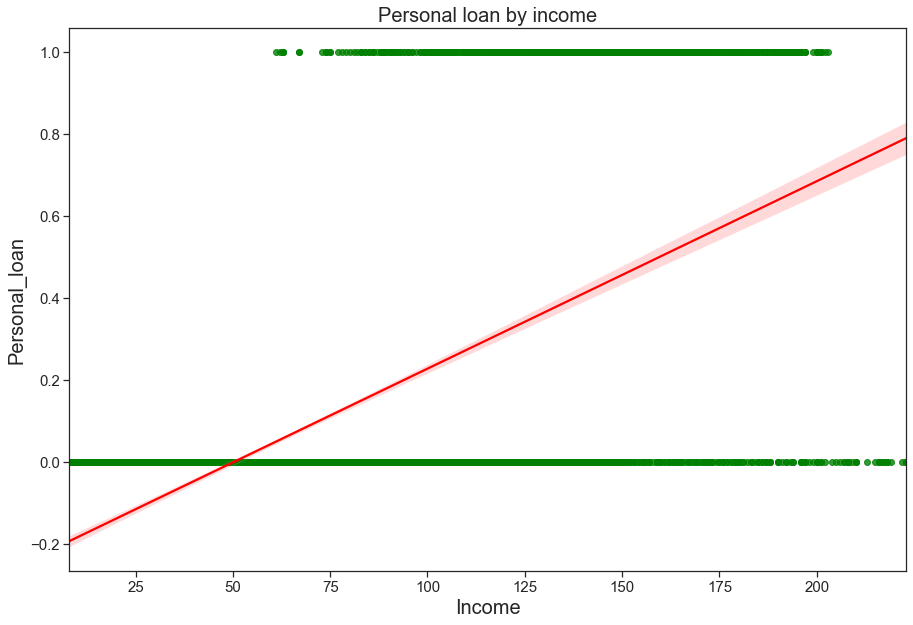

In [21]:
# Regression plot := Scatter plot + Regression line

sns.regplot(x="income", y="personal_loan", data=loan_df_wo_m, 
            scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Personal loan by income', fontsize = 20)
plt.xlabel("Income", fontsize=20)
plt.ylabel("Personal_loan", fontsize=20)
plt.tick_params(axis='both', which='both', labelsize=15) # x/y axes, minor/major ticks for plt

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('scatterplot-income-personal_loan.png', dpi=300) # dpi=300 is print quality

- How income impacts the loan?
- lower the income, the more likely to take the loan
- both distrubition looks close more or less to normal distribution
- For loan-taker, the distribution is shifted to the right
- Income would be a good variable to predict as potential loan taker. 

#### B. Impact of "mortgage_amt" on taking a loan

Text(0, 0.5, 'Density')

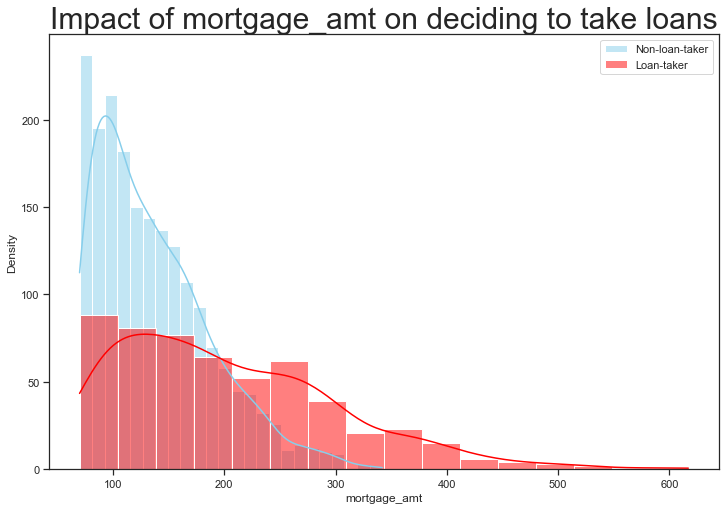

In [22]:
# Plot frequency distributions of non-diabetics and diabetics
# Ref:https://seaborn.pydata.org/generated/seaborn.distplot.html

plt.figure(figsize=(12,8)) # figsize(width, height) in inches - default(6.4, 4.8)

# Histogram with absolute numbers on y-axis (kde=False - default)
#sns.histplot(data=non_diabetics_df, x="glucose", color="skyblue", label="Non-Diabetics")
#sns.histplot(data=diabetics_df, x="glucose", color="red", label="Diabetics")

# Histogram with density on y-xis (kde=True)
sns.histplot(data=no_loan_taker_df[no_loan_taker_df.mortgage_amt!=0], x="mortgage_amt", color="skyblue", label="Non-loan-taker", kde=True)
sns.histplot(data=loan_taker_df[loan_taker_df.mortgage_amt!=0], x="mortgage_amt", color="red", label="Loan-taker", kde=True)

plt.legend()
plt.title('Impact of mortgage_amt on deciding to take loans', fontsize = 30)
plt.xlabel("mortgage_amt")
plt.ylabel("Density")

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('glucose-diabetes.png', dpi=300) # dpi=300 is print quality

- How mortage amount affect customers to take loan?

- The age of diabetics seem to be uniformly distributed, so the mortgate_amt itself does not seem to matter by itself. 

- A group of people who didn't take the mortgate is significantly greater than the group of people who took the mortgage.
- Histogram is to show only the people who took a mortgate.

### 4.2.3 Visualization of categorical variables

#### A. Impact of "mortgate_category" on taking a loan

- mortgate_category is a new column created based on mortgate_amt column. 

In [23]:
def mg_category(df): 
    if df["mortgage_amt"] == 0:
        return 0 # no mortgate
    else:
        return 1 # have mortgate

In [24]:
loan_df_wo_m["mortgate_category"] = \
    loan_df_wo_m.apply(lambda loan_df_wo_m:mg_category(loan_df_wo_m), axis = 1) # axis=1 = row-wise
# Check
loan_df_wo_m.head()

/Users/juyeonkim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan,mortgate_category
0,3815,40.0,9.0,3.0,2,60.0,0,1,1.7,0,0,1,0,0
1,5737,65.0,27.0,4.0,1,36.0,90,0,0.0,0,0,1,0,1
2,4209,61.0,3.0,2.0,0,145.0,314,0,0.0,0,1,1,1,1
3,4734,29.0,14.0,1.0,0,52.0,0,0,0.0,1,0,1,0,0
4,2551,43.0,23.0,4.0,2,33.0,0,0,0.0,0,0,1,0,0


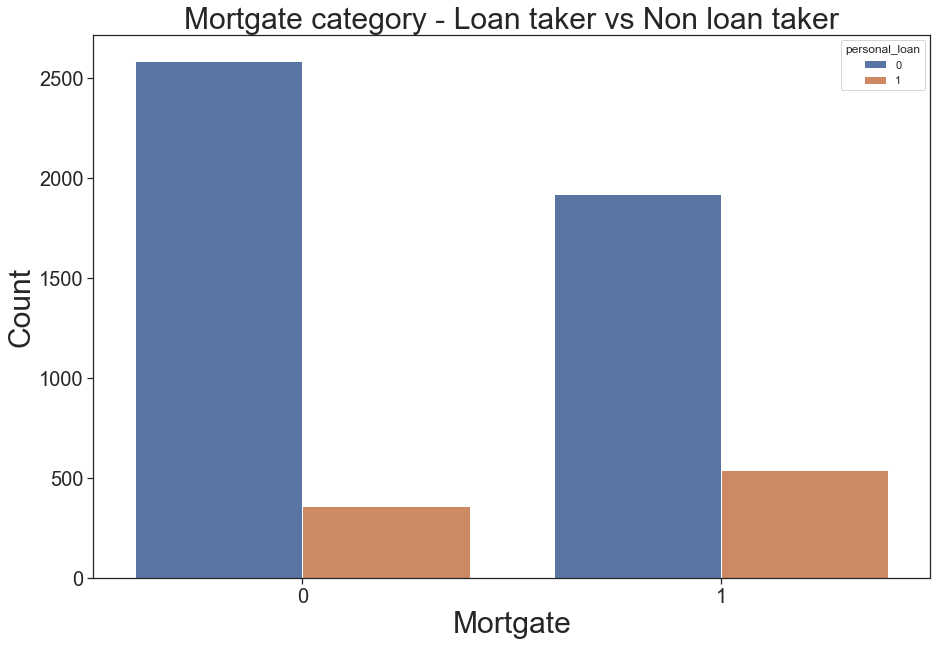

In [25]:
# Plot the charts using Seaborn's countplot()

# As a single plot
sns.countplot(x='mortgate_category', 
              data=loan_df_wo_m, # Whole dataset (non loan taker + loan taker)
              hue='personal_loan') # grouped by outcome

# If the default labels are too small - adjust them to make them bigger
# plt.title('Blood Pressure - Healthy vs Diabetics')
#plt.xlabel("Blood Pressure") # Change the xlabel - "blood_pressure_category" not user friendly
#plt.ylabel("Count")

# Adjust the font sizes
plt.rcParams['figure.figsize'] = (20, 15)
plt.title('Mortgate category - Loan taker vs Non loan taker', fontsize=30)
plt.xlabel("Mortgate", fontsize=30)
plt.ylabel("Count", fontsize=30)
plt.tick_params(axis='both', which='both', labelsize=20) # x/y axes, minor/major ticks for plt

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('fixed_deposit_acct_category-single.png', dpi=300) # dpi=300 is print quality


#### B. Impact of "fixed_deposit_acct" on taking a loan

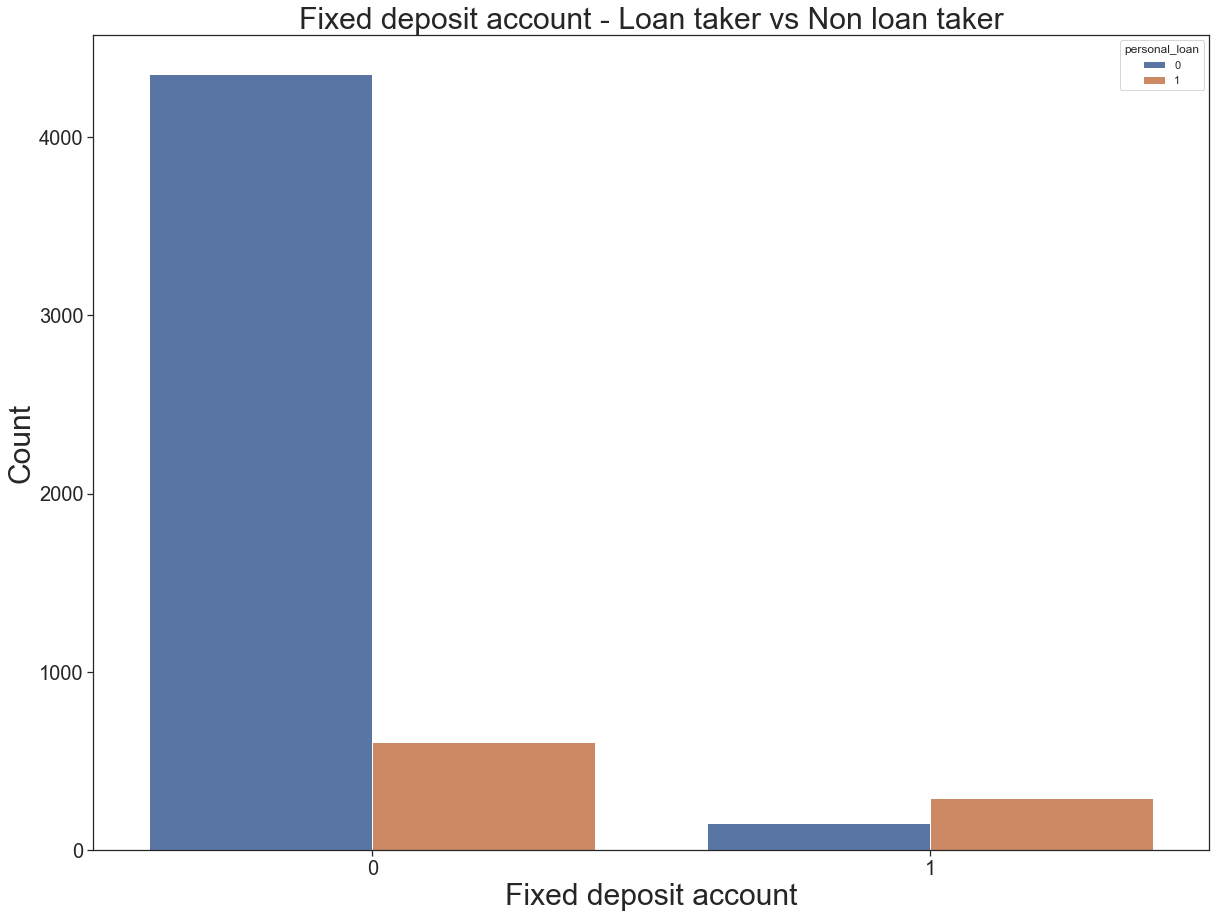

In [26]:
# Plot the charts using Seaborn's countplot()

# As a single plot
sns.countplot(x='fixed_deposit_acct', 
              data=loan_df_wo_m, # Whole dataset (non loan taker + loan taker)
              hue='personal_loan') # grouped by outcome

# If the default labels are too small - adjust them to make them bigger
# plt.title('Blood Pressure - Healthy vs Diabetics')
#plt.xlabel("Blood Pressure") # Change the xlabel - "blood_pressure_category" not user friendly
#plt.ylabel("Count")

# Adjust the font sizes
plt.rcParams['figure.figsize'] = (20, 15)
plt.title('Fixed deposit account - Loan taker vs Non loan taker', fontsize=30)
plt.xlabel("Fixed deposit account", fontsize=30)
plt.ylabel("Count", fontsize=30)
plt.tick_params(axis='both', which='both', labelsize=20) # x/y axes, minor/major ticks for plt

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('fixed_deposit_acct_category-single.png', dpi=300) # dpi=300 is print quality


- A group of people who doesn't have a fixed deposit account is more unlikely to take the personal loan. 


- Looking at the people who took a loan, there do not seem to be a remarkable difference between 2 categories, except for the fact that people without fixed deposit account is slightly more likely to take loan than people with fixed deposit account.


- Cannot tell for sure that fixed deposit account will be a good predictor of being potential loan-taker. 

# 5. Data Cleaning


****no!!! have to repeat these tasks all over again !!***

We already went through 5.1-5.3 practices in the above section 1-2, and get the result dataframe of "loan_df". <br>


We will continue using "load_df" for the following subsections. 

In [27]:
loan_df_cp = loan_df.copy()

## 5.1. Import libraries

*Please refer to ...*

## 5.2. Load and check data

## 5.3. Fix data types

## 5.4. Delete duplicate rows

In [28]:
if len(loan_df_cp) != len(loan_df_cp.drop_duplicates()):
    loan_df_cp.drop_duplicates(inplace=True) # will keep first copy

    loan_df_cp.reset_index(drop=True, inplace=True) # reset index to default integer index

    # Check
    print(loan_df_cp.shape)
    
    print(f'\t Duplicated rows deleted successfully!')

else:
    print(f'\t No duplicated row found.')

	 No duplicated row found.


## 5.5. Handle missing values

### 5.5.1. Percentage of missing values encoded as NaN

In [29]:
# Count of missing values in the whole dataframe by column
loan_df_cp.isnull().sum()

customer_id             0
age                   380
yrs_experience        364
family_size           385
education_level         0
income                377
mortgage_amt            0
credit_card_acct        0
credit_card_spend       0
share_trading_acct      0
fixed_deposit_acct      0
online_acct             0
personal_loan           0
dtype: int64

### 5.5.2. Replace all missing values (NaN) with median values


In [30]:
# Replace NaN with median value in all columns
columns = loan_df_cp.columns.to_list()
columns.remove('personal_loan') # remove an outcome variable

# If you want to use SKlearn's SimpleInputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

for col in columns:
    print(col)
    # Using SimpleImputer to replace all missing values in column with median value
    loan_df_cp[col] = imp_median.fit_transform(loan_df_cp[col].values.reshape(-1, 1))
    # You can also use pandas to do the replacement (also called imputation)
    loan_df_cp[col].fillna(loan_df_cp[col].median(), inplace=True)

# Check - there should be zero percent missing values in all columns
print(round(loan_df_cp.isna().mean() * 100, 4))

customer_id
age
yrs_experience
family_size
education_level
income
mortgage_amt
credit_card_acct
credit_card_spend
share_trading_acct
fixed_deposit_acct
online_acct
customer_id           0.0
age                   0.0
yrs_experience        0.0
family_size           0.0
education_level       0.0
income                0.0
mortgage_amt          0.0
credit_card_acct      0.0
credit_card_spend     0.0
share_trading_acct    0.0
fixed_deposit_acct    0.0
online_acct           0.0
personal_loan         0.0
dtype: float64


### 5.5.3. Handle outliers

- Note: Outliers only apply to continuous numerical values - not to strings or numerical categories!

#### 5.5.3.1. Visualising outliers

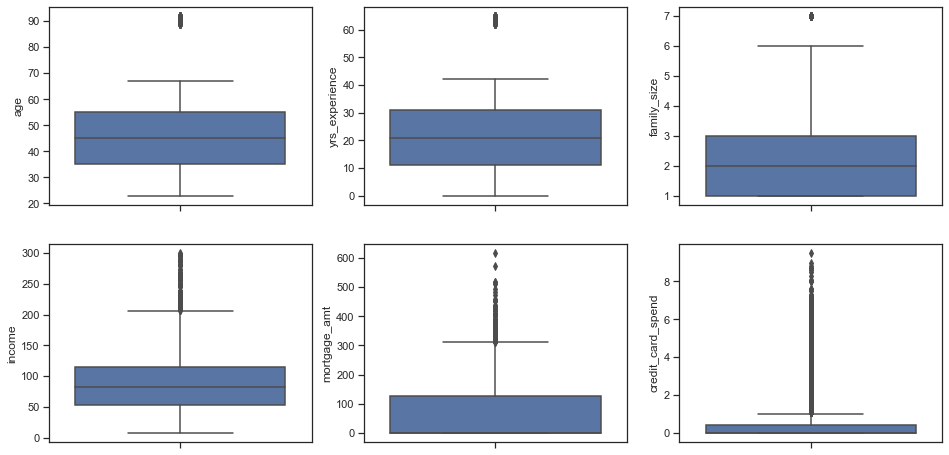

In [31]:
fig, ax = plt.subplots(2,3, figsize=(16,8))  # 2 rows and 4 columns

# Row 0
ax1 = sns.boxplot(y=loan_df_cp["age"], ax=ax[0,0]) # row 0, col 0
ax2 = sns.boxplot(y=loan_df_cp["yrs_experience"], ax=ax[0,1]) 
ax3 = sns.boxplot(y=loan_df_cp["family_size"], ax=ax[0,2])

# Row 1
ax5 = sns.boxplot(y=loan_df_cp["income"], ax=ax[1,0])
ax6 = sns.boxplot(y=loan_df_cp["mortgage_amt"], ax=ax[1,1])
ax7 = sns.boxplot(y=loan_df_cp["credit_card_spend"], ax=ax[1,2])

Result: The output shows the presence of outliers in all continuous variables. 

#### 5.5.3.1. Percentage outliers

- This part is to determine the extent of outliers.
- The standard deviation can be used to identify outliers, if the variable is normally distributed. 

In [32]:
# Finding the percentages of outlier per columns

# Only continuous numerical columns
columns = ["age", "yrs_experience", "family_size", "income", "mortgage_amt", "credit_card_spend"]
print()

for col in columns:
    percentile_25 = loan_df_cp[col].quantile(0.25)
    percentile_75 = loan_df_cp[col].quantile(0.75)
    iqr = percentile_75 - percentile_25 # Inter Quartile Range
    total = len(loan_df_cp[col])

    # Determine the upper and lower boundaries for outliers
    # The lower and upper boundaries are less than the bottom whisker or greater than the top whisker
    #cut_off = iqr * 3    # three times IQR - for detecting extreme outliers
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper}")

    # Count all values that are less than the lower boundary OR those that are greater than the upper boundary
    #num_outliers = diabetes_df[(diabetes_df[col] < lower) | (diabetes_df[col] > upper)].count() 
    # returns a list of things
    num_outliers = len(loan_df_cp[(loan_df_cp[col] < lower) | (loan_df_cp[col] > upper)])
    
    pc_outliers = round(num_outliers*100/total,2)
    
    print(f"Num outliers: {num_outliers}, total rows: {total}, percent: {pc_outliers}")
    print()


col: age, lower: 5.0, upper: 85.0
Num outliers: 66, total rows: 6000, percent: 1.1

col: yrs_experience, lower: -19.0, upper: 61.0
Num outliers: 76, total rows: 6000, percent: 1.27

col: family_size, lower: -2.0, upper: 6.0
Num outliers: 34, total rows: 6000, percent: 0.57

col: income, lower: -37.5, upper: 206.5
Num outliers: 99, total rows: 6000, percent: 1.65

col: mortgage_amt, lower: -187.5, upper: 312.5
Num outliers: 79, total rows: 6000, percent: 1.32

col: credit_card_spend, lower: -0.6000000000000001, upper: 1.0
Num outliers: 1089, total rows: 6000, percent: 18.15



Result: 
- credit_card_spend has the greatest percentage of outliers of 18.15%. 
- family_size has the smallest percentage of outliers of: 0.57%.

#### 5.5.3.2. Replace outliers with median

- How to handle outliers? one of the strategies is to replace outliers with the median value.

In [33]:
# Using Inter Quartile Range (IQR) to detect outliers - for non-normal (non-Gaussian) distributions

# Only continuous numerical columns
columns = ["age", "yrs_experience", "family_size", "income", "mortgage_amt", "credit_card_spend"]
print()

for col in columns:
    median_val = loan_df_cp[col].quantile(0.50)
    percentile_25 = loan_df_cp[col].quantile(0.25)
    percentile_75 = loan_df_cp[col].quantile(0.75)
    iqr = percentile_75 - percentile_25 # Inter Quartile Range
    
    # Determine the upper and lower boundaries for outliers
    # The lower and upper boundaries are less than the bottom whisker or greater than the top whisker
    #cut_off = iqr * 3    # three times IQR - for detecting extreme outliers
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper},  median_val: {median_val}")
    
    # Replace all outliers in column with median value
    # Replace all values that are less than the lower boundary OR those that are greater than the upper boundary
    loan_df_cp[col] = np.where((loan_df_cp[col] < lower) | (loan_df_cp[col] > upper), median_val, loan_df_cp[col])
 
# loan_df_cp.describe()
loan_df_cp.describe().T  # T means transpose - will transpose rows to column


col: age, lower: 5.0, upper: 85.0,  median_val: 45.0
col: yrs_experience, lower: -19.0, upper: 61.0,  median_val: 21.0
col: family_size, lower: -2.0, upper: 6.0,  median_val: 2.0
col: income, lower: -37.5, upper: 206.5,  median_val: 82.0
col: mortgage_amt, lower: -187.5, upper: 312.5,  median_val: 0.0
col: credit_card_spend, lower: -0.6000000000000001, upper: 1.0,  median_val: 0.0


,count,mean,std,min,25%,50%,75%,max
customer_id,6000.0,3027.886667,1723.488432,3.0,1553.75,3045.5,4511.0,6000.0
age,6000.0,45.019500,12.036400,23.0,35.00,45.0,55.0,67.0
yrs_experience,6000.0,20.632000,11.907387,0.0,11.00,21.0,30.0,42.0
family_size,6000.0,2.410167,1.130697,1.0,1.00,2.0,3.0,6.0
education_level,6000.0,0.878667,0.826070,0.0,0.00,1.0,2.0,2.0
income,6000.0,85.143500,42.705751,8.0,54.00,82.0,111.0,206.0
mortgage_amt,6000.0,62.565500,80.372850,0.0,0.00,0.0,120.0,312.0
credit_card_acct,6000.0,0.297167,0.457049,0.0,0.00,0.0,1.0,1.0
credit_card_spend,6000.0,0.055100,0.182409,0.0,0.00,0.0,0.0,1.0
share_trading_acct,6000.0,0.099167,0.298911,0.0,0.00,0.0,0.0,1.0


- For the "yrs_experience", "family_size", "income", "mortgage_amt" columns, the lower cut off points are -17.5, -2.0, -31.5, -180.0 respectively, and there are no such values in the column!
- Any values greater than the upper cut off point were changed to median value. 

### 5.5.4. View cleaned data and pickle


In [38]:
loan_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   float64
 1   age                 6000 non-null   float64
 2   yrs_experience      6000 non-null   float64
 3   family_size         6000 non-null   float64
 4   education_level     6000 non-null   float64
 5   income              6000 non-null   float64
 6   mortgage_amt        6000 non-null   float64
 7   credit_card_acct    6000 non-null   float64
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   float64
 10  fixed_deposit_acct  6000 non-null   float64
 11  online_acct         6000 non-null   float64
 12  personal_loan       6000 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 609.5 KB


In [48]:
# joblib.dump(loan_df_cp, os. getcwd() + '/' + 'diabetes-cleaned.pkl') 

['/Users/juyeonkim/Desktop/sem8/info_sys_solution_n_design/asgnt_03/diabetes-cleaned.pkl']